In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from stocks import StockMarkov, StockGauss, StockUniform, StockLevyStable

### Creating a Stock (Gaussian)

In [2]:
upstate, downstate = np.c_[[1, 0]], np.c_[[0, 1]]
Q = np.array([[0.8, 0.4],
              [0.2, 0.6]])
up_mean, up_sigma = 0.015, 0.005
down_mean, down_sigma = -0.025, 0.01
initial_price = 50

stock1 = StockGauss('XYZ', initial_price, upstate, Q, up_mean, up_sigma, down_mean, down_sigma)
print(f'${stock1.name}:  ${stock1.price}')

$XYZ:  $50


### Up/Down Expected Probabilities

[[0.66666667 0.33333333]]


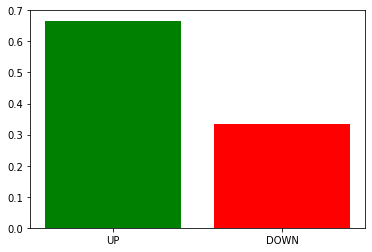

In [3]:
bar_labels = ['UP', 'DOWN']
probs = stock1.fixed_point()
print(probs)
probs_list = [probs[0, 0], probs[0, 1]]

plt.bar(bar_labels, probs_list, color=['green', 'red'])
plt.show()

### Simulate Stock Price Movement over N Days

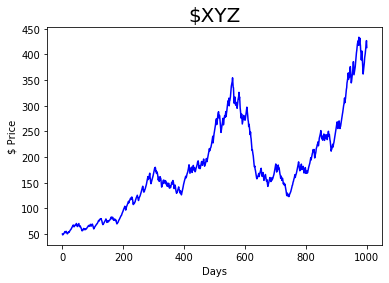

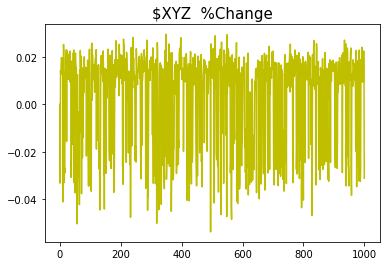

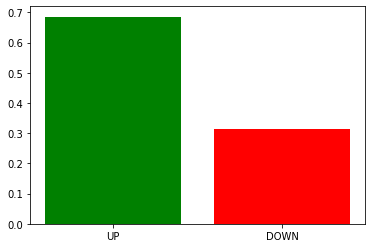

In [31]:
stock1.price = initial_price
stock1.movement = 0
stock1.state = np.array(random.choice([upstate, downstate]))
price = [stock1.price]
movement = [stock1.movement]
days = [0]
plus_count = 0
n = 1000
for day in range(1, n + 1):
    stock1.move()
    price.append(stock1.price)
    movement.append(stock1.movement)
    days.append(day)
    if stock1.state[0,0] == 1:
        plus_count += 1

plt.plot(days, price, color='blue')
plt.title(f'${stock1.name}', fontdict={'fontsize': 20})
plt.xlabel('Days')
plt.ylabel('$ Price')
plt.show()

plt.plot(days, movement, color='y')
plt.title(f'${stock1.name}  %Change', fontdict={'fontsize': 15})
plt.show()

uppity, downer = plus_count/(n-1), (1-plus_count/(n-1))

plt.bar(bar_labels, [uppity, downer], color=['green', 'red'])
plt.show()


### Getting Real Data

In [5]:
import os
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

def read_csv_advanced(path, file):
    full_path = os.path.join(path, file)
    return pd.read_csv(full_path)

In [ ]:
path1 = 'D:/noisy market model/source/analysis/data/2010-06-08___2020-06-08'
ticker = 'DIS'
file1 = f'{ticker}___2010-06-08___2020-06-08.csv'
df1 = read_csv_advanced(path1, file1)

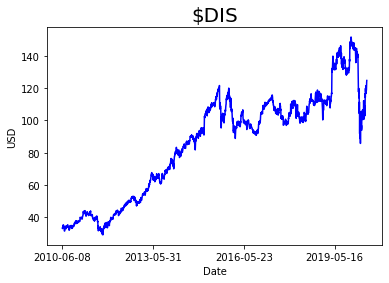

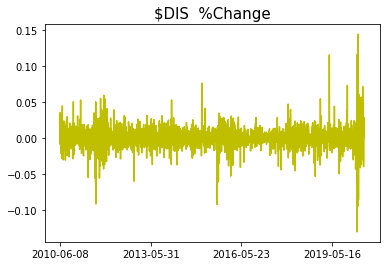

In [7]:
x0 = 0
dur = max(df1.index)
dfrange = df1.iloc[x0:x0 + dur + 1, :]
plt.plot(dfrange.iloc[:, 0], dfrange.iloc[:, 4], color='blue')

plt.xticks(dfrange.Date[::750])
plt.xlabel('Date')
plt.ylabel('USD')

plt.title(f'${ticker}', fontdict={'fontsize': 20})

# plt.savefig(f'${ticker}_Price_Graph___{dfrange.iloc[0, 0]}___{dfrange.iloc[max(dfrange.index)-1, 0]}.png', dpi=300)

plt.show()


plt.plot(dfrange.iloc[:, 0], dfrange.iloc[:, 6], color='y')
plt.xticks(dfrange.Date[::750])
plt.title(f'${ticker}  %Change', fontdict={'fontsize': 15})

plt.show()

In [ ]:
path2 = 'D:/noisy market model/source/analysis'
file2 = 'Q-Matrix___2010-06-08___2020-06-08.csv'
df2 = read_csv_advanced(path2, file2)

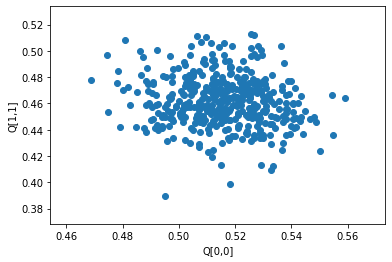

In [9]:
plt.scatter(df2['Q[0,0]'], df2['Q[1,1]'])
plt.xlabel('Q[0,0]')
plt.ylabel('Q[1,1]')
plt.show()

In [10]:
import scipy
from scipy import stats as st
mu_q00, sigma_q00 = scipy.stats.norm.fit(df2['Q[0,0]'])

print(f'Q[0,0]: mean={mu_q00} sigma={sigma_q00}')
print(f'Q[1,0]: uniquely determined as (1 - Q[0,0])')

mu_q11, sigma_q11 = st.norm.fit(df2['Q[1,1]'])

print(f'Q[0,1]: uniquely determined as (1 - Q[1,1])')
print(f'Q[1,1]: mean = {mu_q11} sigma={sigma_q11}')

rho , p_value= st.pearsonr(df2['Q[0,0]'],df2['Q[1,1]'] )
print(f"rho={rho};   p-value(null hp: no correlation)={p_value}")

Q[0,0]: mean=0.5156659381394237 sigma=0.015323674691865425
Q[1,0]: uniquely determined as (1 - Q[0,0])
Q[0,1]: uniquely determined as (1 - Q[1,1])
Q[1,1]: mean = 0.4622028375221665 sigma=0.019194149881079158
rho=-0.1266169137051855;   p-value(null hp: no correlation)=0.008123103165783995


### UP/DOWN Expected probabilities (based on data)

[[0.52615276 0.47384724]]


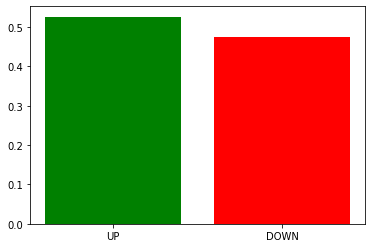

In [11]:
q_mean = np.array([[mu_q00, (1 - mu_q11)],
                   [(1 - mu_q00), mu_q11]])
meanstock = StockMarkov('XYZ', initial_price, np.array(random.choice([upstate, downstate])), q_mean)
fix = meanstock.fixed_point()
print(fix)
fix_list = [fix[0,0], fix[0,1]]
plt.bar(bar_labels, fix_list, color=['green', 'red'])
plt.show()

### Fitting %Change data to Levy-Stable distribution

(par=0, alpha=1.61, beta=-0.03, mu=0.00, sigma=0.01, -7370.798636767373)
[ 1.61165723e+00 -2.84870956e-02  8.01639383e-04  7.38154309e-03]
mu_gauss = 0.0006419612702008805  sigma_gauss = 0.015080920627029726


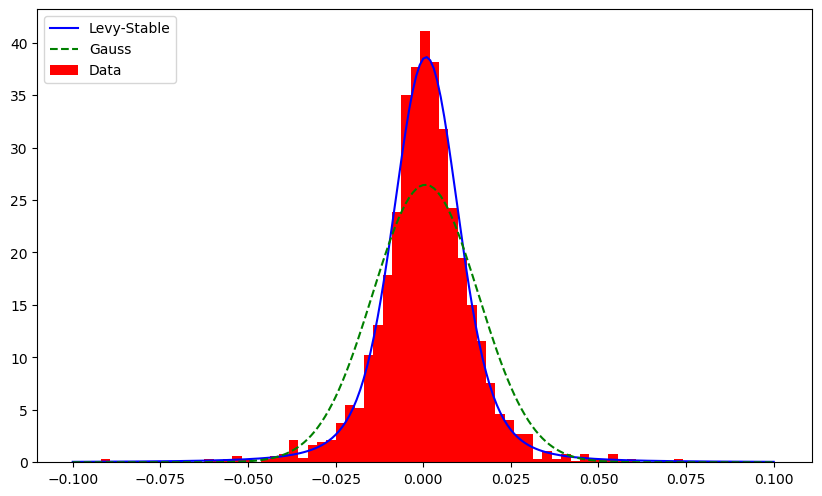

In [12]:
import levy
levp = levy.fit_levy(df1['%Change'])
print(levp)
lp = levp[0].get('0')
print(lp)

plt.figure(figsize =(10,6), dpi=100)

plot_range = (-0.100, 0.101)
plt.hist(df1['%Change'], bins=75, range=plot_range, density=True, color = 'red', label='Data')

x_levy = np.arange(plot_range[0], plot_range[1], 0.001)
y_levy = levy.levy(x_levy, lp[0], lp[1], lp[2], lp[3])
plt.plot(x_levy, y_levy, color = 'blue', label='Levy-Stable')

mu_wrong, sigma_wrong = st.norm.fit(df1['%Change'])
y_gauss = st.norm.pdf(x_levy, mu_wrong, sigma_wrong)
print(f'mu_gauss = {mu_wrong}  sigma_gauss = {sigma_wrong}')
plt.plot(x_levy, y_gauss, 'g--', label='Gauss')


plt.legend(loc=2)

# plt.savefig(f'${ticker}_Levy-Stable_Fit___{df1.iloc[0, 0]}___{df1.iloc[max(df1.index)-1, 0]}.png', dpi=300)

plt.show()

# help(levy)

In [ ]:
path3 = path2
file3 = 'Levy-Stable___2010-06-08___2020-06-08.csv'
df3 = read_csv_advanced(path3, file3)
mean_levy_par = np.mean(df3.Alpha), np.mean(df3.Beta), np.mean(df3.Mu), np.mean(df3.Sigma)
std_levy_par = np.std(df3.Alpha), np.std(df3.Beta), np.std(df3.Mu), np.std(df3.Sigma)
print(mean_levy_par)
print(std_levy_par)

### All parameters covariance/correlation

In [14]:
parameters_columns = df2['Q[0,0]'], df2['Q[1,1]'], df3.Alpha, df3.Beta, df3.Mu, df3.Sigma
parameters_corr = np.corrcoef(parameters_columns)
parameters_cov = np.cov(parameters_columns)
parameters_mean = np.mean(parameters_columns, axis=1)
print(parameters_mean)
print(parameters_corr)

[ 5.15665938e-01  4.62202838e-01  1.62317052e+00 -5.70679074e-02
  8.25662420e-04  9.10512764e-03]
[[ 1.         -0.12661691 -0.01732679 -0.38531985  0.51916915 -0.25635733]
 [-0.12661691  1.          0.02164631  0.33425093 -0.54076214  0.47472546]
 [-0.01732679  0.02164631  1.         -0.23610673  0.21282615  0.00246313]
 [-0.38531985  0.33425093 -0.23610673  1.         -0.70621928  0.47905047]
 [ 0.51916915 -0.54076214  0.21282615 -0.70621928  1.         -0.27744765]
 [-0.25635733  0.47472546  0.00246313  0.47905047 -0.27744765  1.        ]]


### Partial Autocorrelation of the Up/Down States

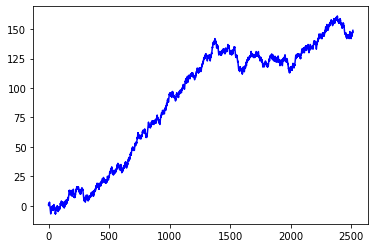

In [15]:
startplot, endplot = 0, max(df1.index)
# Defined a quantity 'State Sum' that increments +1 if stock closes UP, decreases -1 if stock closes DOWN
plt.plot(range(startplot, endplot), df1['State Sum'][startplot:endplot], color = 'b')
plt.show()

In [16]:
import statsmodels.tsa.stattools as smt

[ 1.00000000e+00  9.99348004e-01  8.26250297e-04  2.31082673e-02
  2.69952841e-03 -2.41722168e-03  3.53094876e-02 -1.01049219e-02]


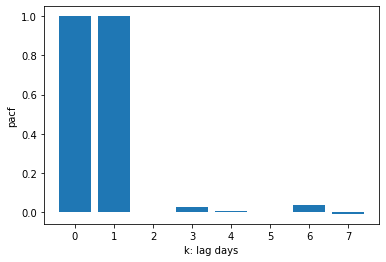

pacf of the up/down time series shows us that there 
is statistically no correlation for lags > 1.
Therefore our Markov Chain is a good model.


In [17]:
nlag = 7
pacorr = smt.pacf(df1['State Sum'][startplot:endplot], nlags=nlag)
print(pacorr)
plt.bar(range(nlag + 1), pacorr)

plt.xlabel('k: lag days')
plt.xticks(range(0, 8, 1))
plt.ylabel('pacf')

plt.show()
print('pacf of the up/down time series shows us that there '
      '\nis statistically no correlation for lags > 1.'
      '\nTherefore our Markov Chain is a good model.')

### Creating a Stock (Levy-Stable)

In [18]:
stock2_parameters = np.random.multivariate_normal(parameters_mean, parameters_cov)

q00_post, q11_post = stock2_parameters[:2]

Q_post = np.array([[q00_post, 1 - q11_post],
                   [1 - q00_post, q11_post]])

levy_par_post = stock2_parameters[2:]

stock2 = StockLevyStable('ABC', initial_price, upstate, Q_post, 
                         levy_par_post[0], levy_par_post[1], 
                         levy_par_post[2], levy_par_post[3])

### Up/Down Expected probabilities

[[0.52172849 0.47827151]]


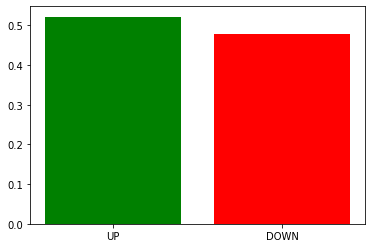

In [19]:
bar_labels2 = ['UP', 'DOWN']
probs2 = stock2.fixed_point()
print(probs2)
probs_list2 = [probs2[0, 0], probs2[0, 1]]

plt.bar(bar_labels2, probs_list2, color=['green', 'red'])
plt.show()

### Simulating Stock Price Movement over N Days

[[0.52782601 0.51507694]
 [0.47217399 0.48492306]]
alpha = 1.5550352474135993; beta = -0.010236227220650443; mu = 0.0004806454586425776, sigma = 0.00967542351706594


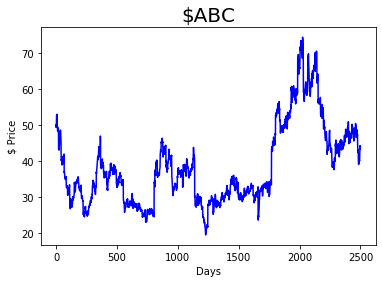

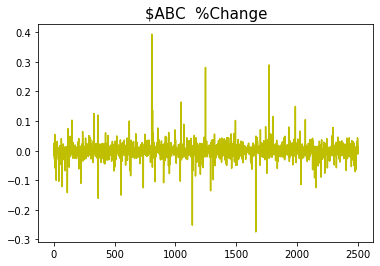

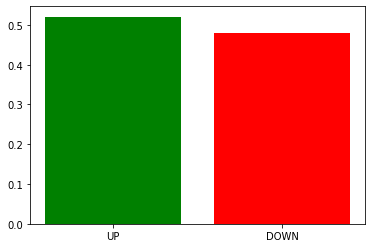

   0.5206082432973189   0.4793917567026811


In [33]:
stock2.price = initial_price
stock2.movement = 0
price2 = [stock2.price]
movement2 = [stock2.movement]
days2 = [0]
plus_count2 = 0
n = 2500
for day in range(1, n + 1):
    stock2.move()
    price2.append(stock2.price)
    movement2.append(stock2.movement)
    days2.append(day)
    if stock2.state[0,0] == 1:
        plus_count2 += 1

print(stock2.q)
print(f'alpha = {stock2.alpha}; beta = {stock2.beta}; mu = {stock2.delta}, sigma = {stock2.gamma}')

        
plt.plot(days2, price2, color='blue')
plt.title(f'${stock2.name}', fontdict={'fontsize': 20})
plt.xlabel('Days')
plt.ylabel('$ Price')
plt.show()

if any(price > 500 for price in price2):
    plt.plot(days2, price2, color='blue')
    plt.yscale('log')
    plt.title(f'${stock2.name}', fontdict={'fontsize': 20})
    plt.xlabel('Days')
    plt.ylabel('Log $ Price')
    plt.show()

plt.plot(days2, movement2, color='y')
plt.title(f'${stock2.name}  %Change', fontdict={'fontsize': 15})
plt.show()

uppity2, downer2 = plus_count2/(n-1), (1-plus_count2/(n-1))

plt.bar(bar_labels2, [uppity2, downer2], color=['green', 'red'])
plt.show()

print('   ' + str(uppity2) + '   ' + str(downer2))